In [1]:
#Imports
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openweathermapy.core as ow
from citipy import citipy 
import random
import requests as req
import urllib
from time import sleep

In [4]:
#Load in API key
with open('owm_api.txt', 'r') as file_object:
    #Text document that is untracked in project-one directory (NOT pushed to git) with API key
    #Create a file called untracked_api_key.txt with your key and DO NOT add to git (add to .gitignore or have outside repository)
    api_key  = str(file_object.readline()).strip()

#Openweather map API base url
base_url = "http://api.openweathermap.org/data/2.5/weather"

In [7]:


#Random selection of 500 unique cities based on lat/long coordinates
#Truncate random coordinates to 6 decimal points each
def truncate(x, d): #Source for truncate() function: https://stackoverflow.com/a/20545024
    return int(x*(10.0**d))/(10.0**d)
    #x = input
    #d = decimal places to truncate to

cityList = []
selected_cites = []
uniqueCityCount = 0

while (uniqueCityCount < 550):
    random_lat = truncate(random.uniform(-90,90),6)
    random_long = truncate(random.uniform(-180,180),6)
    cityToCheck = citipy.nearest_city(random_lat, random_long).city_name
    #Pass query to OpenWeatherMap API to check if city is in database
    
    query_city = cityToCheck
    
    query_url = base_url + "?apikey=" + api_key + "&q=" + query_city
    sleep(2.5)
    response = req.get(query_url)
    sleep(1.5)
    json_data = response.json()
    print(json_data)
    
    #Prevent duplicates from being appended to the cityList (before dataframe creation)
    #While also not adding the specified city if not in OWM database
    if cityToCheck not in cityList and json_data['cod'] != '404':
        cityList.append(cityToCheck)
        uniqueCityCount = uniqueCityCount+ 1 
    print("uniqueCityCount " + str(uniqueCityCount))
        
#Create dataframe with uniqueCity names        
raw_cities_df = pd.DataFrame({"City Name": cityList})

#Not needed if duplicates removed before dataframe creation: 
#raw_cities_df = raw_cities_df.drop_duplicates() 

#Creation of column for city number
raw_cities_df['City Number'] = raw_cities_df.index + 1
raw_cities_df= raw_cities_df[['City Number','City Name']]
cn = pd.to_numeric(raw_cities_df['City Number'], errors='raise', downcast=None)
raw_cities_df.to_csv("raw_cities_list.csv", mode ='w')

{'coord': {'lon': 25.93, 'lat': 60.95}, 'weather': [{'id': 620, 'main': 'Snow', 'description': 'light shower snow', 'icon': '13n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 268.15, 'pressure': 1013, 'humidity': 92, 'temp_min': 268.15, 'temp_max': 268.15}, 'visibility': 1300, 'wind': {'speed': 1, 'deg': 330}, 'clouds': {'all': 75}, 'dt': 1522273800, 'sys': {'type': 1, 'id': 5047, 'message': 0.003, 'country': 'FI', 'sunrise': 1522209021, 'sunset': 1522256000}, 'id': 645036, 'name': 'Nastola', 'cod': 200}
uniqueCityCount 1
{'cod': '404', 'message': 'city not found'}
uniqueCityCount 1
{'coord': {'lon': -53.46, 'lat': -33.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 295.842, 'pressure': 1028.65, 'humidity': 81, 'temp_min': 295.842, 'temp_max': 295.842, 'sea_level': 1030.15, 'grnd_level': 1028.65}, 'wind': {'speed': 4.81, 'deg': 68.0092}, 'clouds'

{'coord': {'lon': -60.23, 'lat': -38.31}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 299.917, 'pressure': 1012.44, 'humidity': 37, 'temp_min': 299.917, 'temp_max': 299.917, 'sea_level': 1024.11, 'grnd_level': 1012.44}, 'wind': {'speed': 5.46, 'deg': 325.009}, 'clouds': {'all': 0}, 'dt': 1522275104, 'sys': {'message': 0.1652, 'country': 'AR', 'sunrise': 1522231935, 'sunset': 1522274305}, 'id': 3833859, 'name': 'Barrow', 'cod': 200}
uniqueCityCount 16
{'coord': {'lon': -12.5, 'lat': 7.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 299.792, 'pressure': 1020.87, 'humidity': 84, 'temp_min': 299.792, 'temp_max': 299.792, 'sea_level': 1023.46, 'grnd_level': 1020.87}, 'wind': {'speed': 2.36, 'deg': 250.509}, 'clouds': {'all': 0}, 'dt': 1522275289, 'sys': {'message': 0.0044, 'country': 'SL', 'sunrise': 1522219781, 'sunset': 1522263596},

{'coord': {'lon': -173.23, 'lat': 64.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 267.15, 'pressure': 1019, 'humidity': 73, 'temp_min': 267.15, 'temp_max': 267.15}, 'visibility': 10000, 'wind': {'speed': 5, 'deg': 220}, 'clouds': {'all': 75}, 'dt': 1522272600, 'sys': {'type': 1, 'id': 7239, 'message': 0.1662, 'country': 'RU', 'sunrise': 1522256417, 'sunset': 1522304198}, 'id': 4031574, 'name': 'Provideniya', 'cod': 200}
uniqueCityCount 30
{'coord': {'lon': -77.59, 'lat': 17.89}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.292, 'pressure': 991.52, 'humidity': 60, 'temp_min': 299.292, 'temp_max': 299.292, 'sea_level': 1026.67, 'grnd_level': 991.52}, 'wind': {'speed': 3.01, 'deg': 92.0092}, 'clouds': {'all': 88}, 'dt': 1522275364, 'sys': {'message': 0.0043, 'country': 'JM', 'sunrise': 1522235232, 'sunset': 1522279

{'coord': {'lon': 37.26, 'lat': 44.99}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 281.15, 'pressure': 1009, 'humidity': 93, 'temp_min': 281.15, 'temp_max': 281.15}, 'visibility': 10000, 'wind': {'speed': 7, 'deg': 70}, 'clouds': {'all': 68}, 'dt': 1522272600, 'sys': {'type': 1, 'id': 7294, 'message': 0.0038, 'country': 'RU', 'sunrise': 1522207074, 'sunset': 1522252466}, 'id': 473295, 'name': 'Vityazevo', 'cod': 200}
uniqueCityCount 42
{'coord': {'lon': 114.09, 'lat': 71.97}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 256.667, 'pressure': 992.17, 'humidity': 66, 'temp_min': 256.667, 'temp_max': 256.667, 'sea_level': 1004.58, 'grnd_level': 992.17}, 'wind': {'speed': 3.21, 'deg': 262.009}, 'clouds': {'all': 64}, 'dt': 1522275452, 'sys': {'message': 0.1653, 'country': 'RU', 'sunrise': 1522186678, 'sunset': 1522236112}, 'i

{'coord': {'lon': 40.07, 'lat': 1.75}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 295.917, 'pressure': 993.63, 'humidity': 91, 'temp_min': 295.917, 'temp_max': 295.917, 'sea_level': 1024.88, 'grnd_level': 993.63}, 'wind': {'speed': 1.86, 'deg': 165.009}, 'clouds': {'all': 12}, 'dt': 1522275525, 'sys': {'message': 0.1632, 'country': 'KE', 'sunrise': 1522207251, 'sunset': 1522250893}, 'id': 178443, 'name': 'Wajir', 'cod': 200}
uniqueCityCount 54
{'coord': {'lon': -139.03, 'lat': -9.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 300.842, 'pressure': 1025.81, 'humidity': 100, 'temp_min': 300.842, 'temp_max': 300.842, 'sea_level': 1025.81, 'grnd_level': 1025.81}, 'wind': {'speed': 6.66, 'deg': 123.509}, 'clouds': {'all': 32}, 'dt': 1522275390, 'sys': {'message': 0.0039, 'country': 'PF', 'sunrise': 1522250392, 'sunset': 1522

{'coord': {'lon': 74.49, 'lat': 15.34}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.417, 'pressure': 958.29, 'humidity': 95, 'temp_min': 295.417, 'temp_max': 295.417, 'sea_level': 1023.14, 'grnd_level': 958.29}, 'wind': {'speed': 1.46, 'deg': 269.509}, 'clouds': {'all': 76}, 'dt': 1522275582, 'sys': {'message': 0.0038, 'country': 'IN', 'sunrise': 1522198794, 'sunset': 1522242843}, 'id': 1273574, 'name': 'Vaini', 'cod': 200}
uniqueCityCount 64
{'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 291.15, 'pressure': 1011, 'humidity': 77, 'temp_min': 291.15, 'temp_max': 291.15}, 'wind': {'speed': 2.1, 'deg': 60}, 'rain': {'3h': 1.36}, 'clouds': {'all': 92}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 6591, 'message': 0.1631, 'country': 'ZA', 'sunrise': 1522212588, 'sunset': 1522255135}, 'id': 1

{'coord': {'lon': -63.55, 'lat': 8.12}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 308.067, 'pressure': 1010.49, 'humidity': 33, 'temp_min': 308.067, 'temp_max': 308.067, 'sea_level': 1020.87, 'grnd_level': 1010.49}, 'wind': {'speed': 6.06, 'deg': 72.5092}, 'clouds': {'all': 20}, 'dt': 1522275659, 'sys': {'message': 0.0034, 'country': 'VE', 'sunrise': 1522232020, 'sunset': 1522275856}, 'id': 3645532, 'name': 'Ciudad Bolivar', 'cod': 200}
uniqueCityCount 75
{'coord': {'lon': -73.75, 'lat': 42.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 281.65, 'pressure': 1016, 'humidity': 66, 'temp_min': 281.15, 'temp_max': 282.15}, 'visibility': 16093, 'wind': {'speed': 1.46, 'deg': 322.009}, 'clouds': {'all': 90}, 'dt': 1522274040, 'sys': {'type': 1, 'id': 2088, 'message': 0.0047, 'country': 'US', 'sunrise': 1522233757, 'sunset': 

{'coord': {'lon': -109.96, 'lat': 27.57}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 303.15, 'pressure': 1011, 'humidity': 6, 'temp_min': 303.15, 'temp_max': 303.15}, 'visibility': 16093, 'wind': {'speed': 1.5, 'deg': 300}, 'clouds': {'all': 5}, 'dt': 1522273380, 'sys': {'type': 1, 'id': 3975, 'message': 0.0139, 'country': 'MX', 'sunrise': 1522242815, 'sunset': 1522287352}, 'id': 4013593, 'name': 'Cocorit', 'cod': 200}
uniqueCityCount 86
{'coord': {'lon': 37.27, 'lat': 25.02}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 301.917, 'pressure': 1007.17, 'humidity': 56, 'temp_min': 301.917, 'temp_max': 301.917, 'sea_level': 1020.26, 'grnd_level': 1007.17}, 'wind': {'speed': 9.21, 'deg': 153.009}, 'clouds': {'all': 0}, 'dt': 1522275737, 'sys': {'message': 0.0035, 'country': 'SA', 'sunrise': 1522207556, 'sunset': 1522251952}, 'id': 1009

{'coord': {'lon': -151.75, 'lat': -16.48}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 301.842, 'pressure': 1027.35, 'humidity': 97, 'temp_min': 301.842, 'temp_max': 301.842, 'sea_level': 1027.39, 'grnd_level': 1027.35}, 'wind': {'speed': 5.46, 'deg': 78.5092}, 'clouds': {'all': 80}, 'dt': 1522275809, 'sys': {'message': 0.0037, 'country': 'PF', 'sunrise': 1522253543, 'sunset': 1522296639}, 'id': 4034551, 'name': 'Faanui', 'cod': 200}
uniqueCityCount 95
{'coord': {'lon': -74.98, 'lat': 39.31}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 283.31, 'pressure': 1016, 'humidity': 81, 'temp_min': 282.15, 'temp_max': 284.15}, 'visibility': 16093, 'wind': {'speed': 2.1, 'deg': 240}, 'clouds': {'all': 90}, 'dt': 1522274160, 'sys': {'type': 1, 'id': 1971, 'message': 0.004

{'coord': {'lon': -28.7, 'lat': 38.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 287.967, 'pressure': 1043.32, 'humidity': 100, 'temp_min': 287.967, 'temp_max': 287.967, 'sea_level': 1046.93, 'grnd_level': 1043.32}, 'wind': {'speed': 5.76, 'deg': 20.0092}, 'clouds': {'all': 0}, 'dt': 1522275318, 'sys': {'message': 0.0035, 'country': 'PT', 'sunrise': 1522223076, 'sunset': 1522268108}, 'id': 3372707, 'name': 'Ribeira Grande', 'cod': 200}
uniqueCityCount 104
{'coord': {'lon': -73.75, 'lat': 42.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 281.65, 'pressure': 1016, 'humidity': 66, 'temp_min': 281.15, 'temp_max': 282.15}, 'visibility': 16093, 'wind': {'speed': 1.46, 'deg': 322.009}, 'clouds': {'all': 90}, 'dt': 1522274040, 'sys': {'type': 1, 'id': 2088, 'message': 0.0047, 'country': 'US', 'sunrise': 1522233757, 'sunset': 1

{'cod': '404', 'message': 'city not found'}
uniqueCityCount 113
{'coord': {'lon': -68.8, 'lat': -33.01}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 303.15, 'pressure': 1011, 'humidity': 23, 'temp_min': 303.15, 'temp_max': 303.15}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 70}, 'clouds': {'all': 0}, 'dt': 1522270800, 'sys': {'type': 1, 'id': 4700, 'message': 0.1634, 'country': 'AR', 'sunrise': 1522233894, 'sunset': 1522276465}, 'id': 3844421, 'name': 'Russell', 'cod': 200}
uniqueCityCount 114
{'coord': {'lon': -60.23, 'lat': -38.31}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 299.917, 'pressure': 1012.44, 'humidity': 37, 'temp_min': 299.917, 'temp_max': 299.917, 'sea_level': 1024.11, 'grnd_level': 1012.44}, 'wind': {'speed': 5.46, 'deg': 325.009}, 'clouds': {'all': 0}, 'dt': 1522275616, 'sys': {'message': 0.0037, 'countr

{'coord': {'lon': -139.03, 'lat': -9.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 300.842, 'pressure': 1025.81, 'humidity': 100, 'temp_min': 300.842, 'temp_max': 300.842, 'sea_level': 1025.81, 'grnd_level': 1025.81}, 'wind': {'speed': 6.66, 'deg': 123.509}, 'clouds': {'all': 32}, 'dt': 1522275390, 'sys': {'message': 0.0039, 'country': 'PF', 'sunrise': 1522250392, 'sunset': 1522293692}, 'id': 4020109, 'name': 'Atuona', 'cod': 200}
uniqueCityCount 116
{'coord': {'lon': 173.16, 'lat': -35.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 292.817, 'pressure': 1022, 'humidity': 91, 'temp_min': 292.817, 'temp_max': 292.817, 'sea_level': 1035.26, 'grnd_level': 1022}, 'wind': {'speed': 2.06, 'deg': 61.0092}, 'clouds': {'all': 0}, 'dt': 1522276024, 'sys': {'message': 0.0045, 'country': 'NZ', 'sunrise': 1522175830, 'sunset': 15222

{'coord': {'lon': 1.45, 'lat': 52.47}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 275.77, 'pressure': 1002, 'humidity': 100, 'temp_min': 275.15, 'temp_max': 276.15}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 240}, 'rain': {'3h': 0.13}, 'clouds': {'all': 32}, 'dt': 1522274160, 'sys': {'type': 1, 'id': 5141, 'message': 0.0038, 'country': 'GB', 'sunrise': 1522215368, 'sunset': 1522261373}, 'id': 2656067, 'name': 'Broome', 'cod': 200}
uniqueCityCount 126
{'coord': {'lon': -70.91, 'lat': -53.16}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 279.342, 'pressure': 990.39, 'humidity': 100, 'temp_min': 279.342, 'temp_max': 279.342, 'sea_level': 1003.45, 'grnd_level': 990.39}, 'wind': {'speed': 13.01, 'deg': 281.509}, 'rain': {'3h': 0.2}, 'clouds': {'all': 36}, 'dt': 1522275533, 'sys': {'message': 0.1636, 'country': 'CL', 'sunrise':

{'coord': {'lon': 58.36, 'lat': 29.11}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 285.592, 'pressure': 888.01, 'humidity': 27, 'temp_min': 285.592, 'temp_max': 285.592, 'sea_level': 1025.49, 'grnd_level': 888.01}, 'wind': {'speed': 1.61, 'deg': 240.009}, 'clouds': {'all': 0}, 'dt': 1522276163, 'sys': {'message': 0.004, 'country': 'IR', 'sunrise': 1522202419, 'sunset': 1522246973}, 'id': 141736, 'name': 'Bam', 'cod': 200}
uniqueCityCount 134
{'coord': {'lon': 135.86, 'lat': -34.72}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 287.067, 'pressure': 1028.25, 'humidity': 100, 'temp_min': 287.067, 'temp_max': 287.067, 'sea_level': 1031.97, 'grnd_level': 1028.25}, 'wind': {'speed': 3.01, 'deg': 291.509}, 'clouds': {'all': 56}, 'dt': 1522275641, 'sys': {'message': 0.3239, 'country': 'AU', 'sunrise': 1522184780, 'sunset': 1522227361

{'coord': {'lon': -67.52, 'lat': -46.43}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 288.209, 'pressure': 999.74, 'humidity': 43, 'temp_min': 288.209, 'temp_max': 288.209, 'sea_level': 1020.79, 'grnd_level': 999.74}, 'wind': {'speed': 11.25, 'deg': 257.505}, 'clouds': {'all': 0}, 'dt': 1522276227, 'sys': {'message': 0.0041, 'country': 'AR', 'sunrise': 1522233866, 'sunset': 1522275861}, 'id': 3863379, 'name': 'Mar del Plata', 'cod': 200}
uniqueCityCount 143
{'coord': {'lon': 167.72, 'lat': -45.41}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 286.809, 'pressure': 967.72, 'humidity': 79, 'temp_min': 286.809, 'temp_max': 286.809, 'sea_level': 1032.22, 'grnd_level': 967.72}, 'wind': {'speed': 1.85, 'deg': 323.505}, 'clouds': {'all': 0}, 'dt': 1522276246, 'sys': {'message': 0.1649, 'country': 'NZ', 'sunrise': 1522177333, 'sunset': 1522

{'coord': {'lon': 128.74, 'lat': -15.77}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 300.15, 'pressure': 1008, 'humidity': 65, 'temp_min': 300.15, 'temp_max': 300.15}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 150}, 'clouds': {'all': 40}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 8215, 'message': 0.1639, 'country': 'AU', 'sunrise': 1522186209, 'sunset': 1522229367}, 'id': 2068110, 'name': 'Kununurra', 'cod': 200}
uniqueCityCount 151
{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.709, 'pressure': 1029.49, 'humidity': 100, 'temp_min': 299.709, 'temp_max': 299.709, 'sea_level': 1029.54, 'grnd_level': 1029.49}, 'wind': {'speed': 3.9, 'deg': 116.005}, 'clouds': {'all': 56}, 'dt': 1522276313, 'sys': {'message': 0.003, 'country': 'PF', 'sunrise': 1522249617, 'sunset': 15

{'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 291.15, 'pressure': 1011, 'humidity': 77, 'temp_min': 291.15, 'temp_max': 291.15}, 'wind': {'speed': 2.1, 'deg': 60}, 'rain': {'3h': 1.36}, 'clouds': {'all': 92}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 6591, 'message': 0.0044, 'country': 'ZA', 'sunrise': 1522212588, 'sunset': 1522255134}, 'id': 1015776, 'name': 'Bredasdorp', 'cod': 200}
uniqueCityCount 158
{'coord': {'lon': -28.7, 'lat': 38.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 287.359, 'pressure': 1043.19, 'humidity': 100, 'temp_min': 287.359, 'temp_max': 287.359, 'sea_level': 1046.77, 'grnd_level': 1043.19}, 'wind': {'speed': 4.85, 'deg': 26.5048}, 'clouds': {'all': 0}, 'dt': 1522276389, 'sys': {'message': 0.0036, 'country': 'PT', 'sunrise': 1522223075, 'sunset': 1522268109}, 'id'

{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.709, 'pressure': 1029.49, 'humidity': 100, 'temp_min': 299.709, 'temp_max': 299.709, 'sea_level': 1029.54, 'grnd_level': 1029.49}, 'wind': {'speed': 3.9, 'deg': 116.005}, 'clouds': {'all': 56}, 'dt': 1522276313, 'sys': {'message': 0.003, 'country': 'PF', 'sunrise': 1522249617, 'sunset': 1522292507}, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
uniqueCityCount 166
{'coord': {'lon': 44.05, 'lat': 53.19}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 264.834, 'pressure': 1004.52, 'humidity': 89, 'temp_min': 264.834, 'temp_max': 264.834, 'sea_level': 1032.66, 'grnd_level': 1004.52}, 'wind': {'speed': 2.2, 'deg': 325.005}, 'clouds': {'all': 56}, 'dt': 1522276470, 'sys': {'message': 0.004, 'country': 'RU', 'sunrise': 1522205127, 'sunset':

{'coord': {'lon': 18.42, 'lat': -33.93}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 290.15, 'pressure': 1012, 'humidity': 93, 'temp_min': 290.15, 'temp_max': 290.15}, 'visibility': 10000, 'wind': {'speed': 1.5}, 'clouds': {'all': 75}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 6529, 'message': 0.1632, 'country': 'ZA', 'sunrise': 1522212967, 'sunset': 1522255533}, 'id': 3369157, 'name': 'Cape Town', 'cod': 200}
uniqueCityCount 176
{'coord': {'lon': -73.83, 'lat': -41.87}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 284.409, 'pressure': 1023.82, 'humidity': 89, 'temp_min': 284.409, 'temp_max': 284.409, 'sea_level': 1031.33, 'grnd_level': 1023.82}, 'wind': {'speed': 1.6, 'deg': 256.505}, 'clouds': {'all': 44}, 'dt': 1522276542, 'sys': {'message': 0.0059, 'country': 'CL', 'sunrise': 1522235275, 'sunset': 1522277486}, 'id

{'coord': {'lon': -46.03, 'lat': 60.72}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 271.15, 'pressure': 1023, 'humidity': 46, 'temp_min': 271.15, 'temp_max': 271.15}, 'visibility': 10000, 'wind': {'speed': 0.5, 'deg': 180}, 'clouds': {'all': 40}, 'dt': 1522273800, 'sys': {'type': 1, 'id': 4791, 'message': 0.0035, 'country': 'GL', 'sunrise': 1522226268, 'sunset': 1522273285}, 'id': 3420846, 'name': 'Qaqortoq', 'cod': 200}
uniqueCityCount 184
{'coord': {'lon': -104.67, 'lat': 23.99}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 296.15, 'pressure': 1017, 'humidity': 16, 'temp_min': 296.15, 'temp_max': 296.15}, 'visibility': 19312, 'wind': {'speed': 9.3, 'deg': 220}, 'clouds': {'all': 75}, 'dt': 1522273260, 'sys': {'type': 1, 'id': 3983, 'message': 0.0047, 'country': 'MX', 'sunrise': 1522241617, 'sunset': 1522286007}, 'id

{'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 282.15, 'pressure': 986, 'humidity': 70, 'temp_min': 282.15, 'temp_max': 282.15}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 290}, 'clouds': {'all': 40}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 4754, 'message': 0.0108, 'country': 'AR', 'sunrise': 1522234301, 'sunset': 1522275788}, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}
uniqueCityCount 188
{'coord': {'lon': -8.72, 'lat': 41.31}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 282.69, 'pressure': 1019, 'humidity': 87, 'temp_min': 282.15, 'temp_max': 283.15}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 340}, 'clouds': {'all': 20}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 5959, 'message': 0.0089, 'country': 'PT', 'sunrise': 1522218207, 'sunset': 1522263392}, 'id': 2739997, '

{'coord': {'lon': 10.45, 'lat': 12.88}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 296.259, 'pressure': 983.61, 'humidity': 21, 'temp_min': 296.259, 'temp_max': 296.259, 'sea_level': 1022.17, 'grnd_level': 983.61}, 'wind': {'speed': 4.4, 'deg': 35.5048}, 'clouds': {'all': 0}, 'dt': 1522276776, 'sys': {'message': 0.0062, 'country': 'NG', 'sunrise': 1522214194, 'sunset': 1522258173}, 'id': 2328952, 'name': 'Nguru', 'cod': 200}
uniqueCityCount 196
{'coord': {'lon': 139.53, 'lat': 35.74}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 286.14, 'pressure': 1017, 'humidity': 71, 'temp_min': 285.15, 'temp_max': 288.15}, 'visibility': 16093, 'wind': {'speed': 1.5, 'deg': 250}, 'clouds': {'all': 1}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 7622, 'message': 0.1635, 'country': 'JP', 'sunrise': 1522182811, 'sunset': 1522227635}, 'id': 1850144, 'name

{'cod': '404', 'message': 'city not found'}
uniqueCityCount 203
{'coord': {'lon': -111.68, 'lat': 43.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 281.42, 'pressure': 1017, 'humidity': 20, 'temp_min': 277.15, 'temp_max': 284.15}, 'visibility': 16093, 'wind': {'speed': 5.7, 'deg': 280, 'gust': 8.2}, 'clouds': {'all': 1}, 'dt': 1522274160, 'sys': {'type': 1, 'id': 933, 'message': 0.0052, 'country': 'US', 'sunrise': 1522242805, 'sunset': 1522288209}, 'id': 5606187, 'name': 'Saint Anthony', 'cod': 200}
uniqueCityCount 204
{'coord': {'lon': 122.68, 'lat': 13.32}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 298.984, 'pressure': 1021.63, 'humidity': 100, 'temp_min': 298.984, 'temp_max': 298.984, 'sea_level': 1024.27, 'grnd_level': 1021.63}, 'wind': {'speed': 5.8, 'deg': 358.505}, 'clouds': {'all': 12}, 'dt': 1522276861, 'sys': {'mes

{'coord': {'lon': -139.03, 'lat': -9.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 300.859, 'pressure': 1023.66, 'humidity': 100, 'temp_min': 300.859, 'temp_max': 300.859, 'sea_level': 1023.67, 'grnd_level': 1023.66}, 'wind': {'speed': 6.6, 'deg': 124.505}, 'clouds': {'all': 32}, 'dt': 1522276659, 'sys': {'message': 0.0038, 'country': 'PF', 'sunrise': 1522250392, 'sunset': 1522293691}, 'id': 4020109, 'name': 'Atuona', 'cod': 200}
uniqueCityCount 211
{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.709, 'pressure': 1029.49, 'humidity': 100, 'temp_min': 299.709, 'temp_max': 299.709, 'sea_level': 1029.54, 'grnd_level': 1029.49}, 'wind': {'speed': 3.9, 'deg': 116.005}, 'clouds': {'all': 56}, 'dt': 1522276592, 'sys': {'message': 0.1631, 'country': 'PF', 'sunrise': 1522249617, 'su

{'coord': {'lon': 147.9, 'lat': 70.62}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 250.159, 'pressure': 1021.63, 'humidity': 85, 'temp_min': 250.159, 'temp_max': 250.159, 'sea_level': 1023.95, 'grnd_level': 1021.63}, 'wind': {'speed': 2.05, 'deg': 322.005}, 'clouds': {'all': 64}, 'dt': 1522276998, 'sys': {'message': 0.163, 'country': 'RU', 'sunrise': 1522178810, 'sunset': 1522227739}, 'id': 2126123, 'name': 'Chokurdakh', 'cod': 200}
uniqueCityCount 215
{'coord': {'lon': -50.22, 'lat': -30.17}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 294.084, 'pressure': 1020.49, 'humidity': 95, 'temp_min': 294.084, 'temp_max': 294.084, 'sea_level': 1030.48, 'grnd_level': 1020.49}, 'wind': {'speed': 2.1, 'deg': 106.005}, 'clouds': {'all': 48}, 'dt': 1522276996, 'sys': {'message': 0.0046, 'country': 'BR', 'sunrise': 1522229384, 'su

{'cod': '404', 'message': 'city not found'}
uniqueCityCount 224
{'coord': {'lon': 119.61, 'lat': 51.31}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 270.209, 'pressure': 941.38, 'humidity': 46, 'temp_min': 270.209, 'temp_max': 270.209, 'sea_level': 1038.86, 'grnd_level': 941.38}, 'wind': {'speed': 2.2, 'deg': 258.005}, 'clouds': {'all': 0}, 'dt': 1522277067, 'sys': {'message': 0.0029, 'country': 'RU', 'sunrise': 1522187103, 'sunset': 1522232929}, 'id': 2019323, 'name': 'Nerchinskiy Zavod', 'cod': 200}
uniqueCityCount 225
{'coord': {'lon': -114.04, 'lat': 27.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 297.309, 'pressure': 1016.85, 'humidity': 28, 'temp_min': 297.309, 'temp_max': 297.309, 'sea_level': 1028.33, 'grnd_level': 1016.85}, 'wind': {'speed': 5.8, 'deg': 310.005}, 'clouds': {'all': 0}, 'dt': 1522277078, 'sys': {'messag

{'coord': {'lon': 161.3, 'lat': 68.75}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 261.734, 'pressure': 1012.87, 'humidity': 76, 'temp_min': 261.734, 'temp_max': 261.734, 'sea_level': 1021.36, 'grnd_level': 1012.87}, 'wind': {'speed': 2, 'deg': 163.505}, 'clouds': {'all': 80}, 'dt': 1522277042, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 1522175865, 'sunset': 1522224236}, 'id': 2126199, 'name': 'Cherskiy', 'cod': 200}
uniqueCityCount 230
{'coord': {'lon': 26.89, 'lat': -33.59}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 293.509, 'pressure': 1015.55, 'humidity': 99, 'temp_min': 293.509, 'temp_max': 293.509, 'sea_level': 1024.27, 'grnd_level': 1015.55}, 'wind': {'speed': 2.95, 'deg': 256.005}, 'rain': {'3h': 0.16}, 'clouds': {'all': 92}, 'dt': 1522277143, 'sys': {'message': 0.0035, 'country': 'ZA', 'sunrise': 15222

{'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 282.15, 'pressure': 986, 'humidity': 70, 'temp_min': 282.15, 'temp_max': 282.15}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 290}, 'clouds': {'all': 40}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 4754, 'message': 0.0108, 'country': 'AR', 'sunrise': 1522234301, 'sunset': 1522275788}, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}
uniqueCityCount 238
{'coord': {'lon': 142.97, 'lat': 53.51}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 266.959, 'pressure': 1015.47, 'humidity': 89, 'temp_min': 266.959, 'temp_max': 266.959, 'sea_level': 1018.36, 'grnd_level': 1015.47}, 'wind': {'speed': 8.85, 'deg': 308.505}, 'clouds': {'all': 56}, 'dt': 1522277212, 'sys': {'message': 0.0037, 'country': 'RU', 'sunrise': 1522181410, 'sunset': 1522227418}, 

{'coord': {'lon': -1.13, 'lat': 38.18}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 288.39, 'pressure': 1012, 'humidity': 76, 'temp_min': 286.15, 'temp_max': 289.15}, 'visibility': 10000, 'wind': {'speed': 3.45, 'deg': 302.505}, 'clouds': {'all': 0}, 'dt': 1522276200, 'sys': {'type': 1, 'id': 5464, 'message': 0.0037, 'country': 'ES', 'sunrise': 1522216474, 'sunset': 1522261478}, 'id': 2517679, 'name': 'Fortuna', 'cod': 200}
uniqueCityCount 247
{'coord': {'lon': -37.51, 'lat': -11.53}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 296.859, 'pressure': 1011.66, 'humidity': 96, 'temp_min': 296.859, 'temp_max': 296.859, 'sea_level': 1026.3, 'grnd_level': 1011.66}, 'wind': {'speed': 3.45, 'deg': 122.505}, 'rain': {'3h': 0.92}, 'clouds': {'all': 88}, 'dt': 1522277284, 'sys': {'message': 0.0083, 'country': 'BR', 'sunrise': 1522226052, 'sun

{'coord': {'lon': -73.48, 'lat': 45.36}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 278.88, 'pressure': 1016, 'humidity': 70, 'temp_min': 278.15, 'temp_max': 280.15}, 'visibility': 14484, 'wind': {'speed': 4.1, 'deg': 230}, 'clouds': {'all': 1}, 'dt': 1522275300, 'sys': {'type': 1, 'id': 3851, 'message': 0.0066, 'country': 'CA', 'sunrise': 1522233602, 'sunset': 1522279082}, 'id': 6138908, 'name': 'Saint-Philippe', 'cod': 200}
uniqueCityCount 254
{'coord': {'lon': -91.49, 'lat': 18.78}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 307.15, 'pressure': 1006, 'humidity': 44, 'temp_min': 307.15, 'temp_max': 307.15}, 'visibility': 11265, 'wind': {'speed': 6.7, 'deg': 140}, 'clouds': {'all': 5}, 'dt': 1522273980, 'sys': {'type': 1, 'id': 3972, 'message': 0.0035, 'country': 'MX', 'sunrise': 1522238550, 'sunset': 1522282744}, 'id': 3526766

{'coord': {'lon': -159.78, 'lat': -21.21}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 303.15, 'pressure': 1013, 'humidity': 89, 'temp_min': 303.15, 'temp_max': 303.15}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 10}, 'clouds': {'all': 75}, 'dt': 1522270800, 'sys': {'type': 1, 'id': 8340, 'message': 0.0033, 'country': 'CK', 'sunrise': 1522255543, 'sunset': 1522298489}, 'id': 4035715, 'name': 'Avarua', 'cod': 200}
uniqueCityCount 259
{'coord': {'lon': -17.03, 'lat': 20.93}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 291.15, 'pressure': 1013, 'humidity': 93, 'temp_min': 291.15, 'temp_max': 291.15}, 'visibility': 8000, 'wind': {'speed': 6.2, 'deg': 330}, 'clouds': {'all': 75}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 6182, 'message': 0.1633, 'country': 'MR', 'sunrise': 1522220652, 'sunset': 1522264910}, 'id': 237

{'cod': '404', 'message': 'city not found'}
uniqueCityCount 263
{'coord': {'lon': -133.03, 'lat': 69.44}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 250.15, 'pressure': 1032, 'humidity': 69, 'temp_min': 250.15, 'temp_max': 250.15}, 'visibility': 24140, 'wind': {'speed': 7.2, 'deg': 110}, 'clouds': {'all': 5}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 3555, 'message': 0.0033, 'country': 'CA', 'sunrise': 1522246191, 'sunset': 1522295166}, 'id': 6170031, 'name': 'Tuktoyaktuk', 'cod': 200}
uniqueCityCount 263
{'coord': {'lon': 19.24, 'lat': -34.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 286.609, 'pressure': 985.07, 'humidity': 93, 'temp_min': 286.609, 'temp_max': 286.609, 'sea_level': 1024.6, 'grnd_level': 985.07}, 'wind': {'speed': 1.35, 'deg': 301.505}, 'clouds': {'all': 56}, 'dt': 1522276605, 'sys': {'message': 0.1654,

{'coord': {'lon': 85.09, 'lat': 19.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 295.084, 'pressure': 1010.6, 'humidity': 94, 'temp_min': 295.084, 'temp_max': 295.084, 'sea_level': 1021.32, 'grnd_level': 1010.6}, 'wind': {'speed': 2.95, 'deg': 211.005}, 'clouds': {'all': 0}, 'dt': 1522277564, 'sys': {'message': 0.0036, 'country': 'IN', 'sunrise': 1522196183, 'sunset': 1522240371}, 'id': 1258714, 'name': 'Rambha', 'cod': 200}
uniqueCityCount 268
{'coord': {'lon': -110.81, 'lat': 39.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 285.15, 'pressure': 1016, 'humidity': 23, 'temp_min': 285.15, 'temp_max': 285.15}, 'visibility': 16093, 'wind': {'speed': 7.7, 'deg': 300, 'gust': 13.4}, 'clouds': {'all': 1}, 'dt': 1522273980, 'sys': {'type': 1, 'id': 2823, 'message': 0.0035, 'country': 'US', 'sunrise': 1522242729, 'sunset': 1522287860}

{'coord': {'lon': 26.67, 'lat': -3.59}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 292.834, 'pressure': 942.11, 'humidity': 98, 'temp_min': 292.834, 'temp_max': 292.834, 'sea_level': 1023.54, 'grnd_level': 942.11}, 'wind': {'speed': 0.95, 'deg': 113.505}, 'clouds': {'all': 48}, 'dt': 1522277642, 'sys': {'message': 0.0055, 'country': 'CD', 'sunrise': 1522210540, 'sunset': 1522254029}, 'id': 214575, 'name': 'Kampene', 'cod': 200}
uniqueCityCount 275
{'coord': {'lon': 112.52, 'lat': 29.72}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 292.609, 'pressure': 1024.47, 'humidity': 79, 'temp_min': 292.609, 'temp_max': 292.609, 'sea_level': 1027.88, 'grnd_level': 1024.47}, 'wind': {'speed': 2.5, 'deg': 165.005}, 'clouds': {'all': 88}, 'dt': 1522277653, 'sys': {'message': 0.1645, 'country': 'CN', 'sunrise': 1522189417, 'sunset

{'coord': {'lon': 38.73, 'lat': 8.96}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 282.084, 'pressure': 777.31, 'humidity': 72, 'temp_min': 282.084, 'temp_max': 282.084, 'sea_level': 1023.34, 'grnd_level': 777.31}, 'wind': {'speed': 2.15, 'deg': 78.5048}, 'clouds': {'all': 0}, 'dt': 1522277443, 'sys': {'message': 0.0044, 'country': 'ET', 'sunrise': 1522207469, 'sunset': 1522251323}, 'id': 344979, 'name': 'Lebu', 'cod': 200}
uniqueCityCount 284
{'coord': {'lon': 18.97, 'lat': -22.45}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 296.15, 'pressure': 1021, 'humidity': 69, 'temp_min': 296.15, 'temp_max': 296.15}, 'wind': {'speed': 1.5, 'deg': 360}, 'rain': {'3h': 0.41}, 'clouds': {'all': 76}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 6913, 'message': 0.0038, 'country': 'NA', 'sunrise': 1522212652, 'sunset': 1522255596}, 'id': 3357247,

{'coord': {'lon': -24.5, 'lat': 14.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 294.009, 'pressure': 1015.14, 'humidity': 100, 'temp_min': 294.009, 'temp_max': 294.009, 'sea_level': 1026.99, 'grnd_level': 1015.14}, 'wind': {'speed': 7.15, 'deg': 31.0048}, 'clouds': {'all': 8}, 'dt': 1522277790, 'sys': {'message': 0.0025, 'country': 'CV', 'sunrise': 1522222545, 'sunset': 1522266596}, 'id': 3374210, 'name': 'Sao Filipe', 'cod': 200}
uniqueCityCount 290
{'coord': {'lon': 168.86, 'lat': -46.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 290.159, 'pressure': 1016.68, 'humidity': 82, 'temp_min': 290.159, 'temp_max': 290.159, 'sea_level': 1031.77, 'grnd_level': 1016.68}, 'wind': {'speed': 2.05, 'deg': 337.505}, 'clouds': {'all': 0}, 'dt': 1522276615, 'sys': {'message': 0.0035, 'country': 'NZ', 'sunrise': 1522177076, 'sunset': 152221

{'coord': {'lon': 168.86, 'lat': -46.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 290.159, 'pressure': 1016.68, 'humidity': 82, 'temp_min': 290.159, 'temp_max': 290.159, 'sea_level': 1031.77, 'grnd_level': 1016.68}, 'wind': {'speed': 2.05, 'deg': 337.505}, 'clouds': {'all': 0}, 'dt': 1522276615, 'sys': {'message': 0.0035, 'country': 'NZ', 'sunrise': 1522177076, 'sunset': 1522219211}, 'id': 6201424, 'name': 'Mataura', 'cod': 200}
uniqueCityCount 295
{'coord': {'lon': -86.95, 'lat': 49.72}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 276.15, 'pressure': 1004, 'humidity': 69, 'temp_min': 276.15, 'temp_max': 276.15}, 'visibility': 24140, 'wind': {'speed': 7.2, 'deg': 180, 'gust': 10.3}, 'clouds': {'all': 90}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 3656, 'message': 0.0056, 'country': 'CA', 'sunrise': 1522236666, 'sunset'

{'coord': {'lon': -68.38, 'lat': 49.12}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 273.15, 'pressure': 1016, 'humidity': 92, 'temp_min': 273.15, 'temp_max': 273.15}, 'wind': {'speed': 3.1, 'deg': 220}, 'clouds': {'all': 90}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 3760, 'message': 0.0046, 'country': 'CA', 'sunrise': 1522232240, 'sunset': 1522278004}, 'id': 5922281, 'name': 'Chute-aux-Outardes', 'cod': 200}
uniqueCityCount 302
{'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 282.15, 'pressure': 986, 'humidity': 70, 'temp_min': 282.15, 'temp_max': 282.15}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 290}, 'clouds': {'all': 40}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 4754, 'message': 0.0108, 'country': 'AR', 'sunrise': 1522234301, 'sunset': 1522275788}, 'id': 3833367, 'name

{'coord': {'lon': -86.95, 'lat': 49.72}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 276.15, 'pressure': 1004, 'humidity': 69, 'temp_min': 276.15, 'temp_max': 276.15}, 'visibility': 24140, 'wind': {'speed': 7.2, 'deg': 180, 'gust': 10.3}, 'clouds': {'all': 90}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 3656, 'message': 0.0056, 'country': 'CA', 'sunrise': 1522236666, 'sunset': 1522282491}, 'id': 5960603, 'name': 'Geraldton', 'cod': 200}
uniqueCityCount 308
{'coord': {'lon': 73.08, 'lat': -0.6}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 301.559, 'pressure': 1023.41, 'humidity': 100, 'temp_min': 301.559, 'temp_max': 301.559, 'sea_level': 1023.38, 'grnd_level': 1023.41}, 'wind': {'speed': 1.3, 'deg': 267.505}, 'clouds': {'all': 80}, 'dt': 1522278019, 'sys': {'message': 0.3387, 'country': 'MV', 'sunrise': 1522199362, 'su

{'coord': {'lon': 25.97, 'lat': 70.98}, 'weather': [{'id': 620, 'main': 'Snow', 'description': 'light shower snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 272.15, 'pressure': 997, 'humidity': 80, 'temp_min': 272.15, 'temp_max': 272.15}, 'visibility': 8000, 'wind': {'speed': 6.7, 'deg': 290}, 'clouds': {'all': 75}, 'dt': 1522273800, 'sys': {'type': 1, 'id': 5307, 'message': 0.0036, 'country': 'NO', 'sunrise': 1522207913, 'sunset': 1522257154}, 'id': 779554, 'name': 'Honningsvag', 'cod': 200}
uniqueCityCount 315
{'coord': {'lon': 103, 'lat': 34.78}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 265.584, 'pressure': 698.76, 'humidity': 65, 'temp_min': 265.584, 'temp_max': 265.584, 'sea_level': 1027.19, 'grnd_level': 698.76}, 'wind': {'speed': 1.05, 'deg': 169.005}, 'clouds': {'all': 0}, 'dt': 1522278115, 'sys': {'message': 0.1642, 'country': 'CN', 'sunrise': 1522191590, 'sunset': 1522236385}, 'id':

{'coord': {'lon': 150.8, 'lat': -2.57}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 302.184, 'pressure': 1020.49, 'humidity': 100, 'temp_min': 302.184, 'temp_max': 302.184, 'sea_level': 1021.64, 'grnd_level': 1020.49}, 'wind': {'speed': 3.55, 'deg': 262.505}, 'clouds': {'all': 48}, 'dt': 1522278185, 'sys': {'message': 0.0037, 'country': 'PG', 'sunrise': 1522180739, 'sunset': 1522224260}, 'id': 2094342, 'name': 'Kavieng', 'cod': 200}
uniqueCityCount 322
{'coord': {'lon': 63.78, 'lat': 67.55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 246.834, 'pressure': 996.42, 'humidity': 45, 'temp_min': 246.834, 'temp_max': 246.834, 'sea_level': 1018.8, 'grnd_level': 996.42}, 'wind': {'speed': 1.85, 'deg': 262.005}, 'clouds': {'all': 0}, 'dt': 1522278189, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 1522199345, 'sunset': 1522

{'cod': '404', 'message': 'city not found'}
uniqueCityCount 327
{'coord': {'lon': 161.92, 'lat': -10.46}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 302.159, 'pressure': 1017.74, 'humidity': 100, 'temp_min': 302.159, 'temp_max': 302.159, 'sea_level': 1020.67, 'grnd_level': 1017.74}, 'wind': {'speed': 3.75, 'deg': 321.505}, 'clouds': {'all': 12}, 'dt': 1522278261, 'sys': {'message': 0.004, 'country': 'SB', 'sunrise': 1522178175, 'sunset': 1522221482}, 'id': 2178753, 'name': 'Kirakira', 'cod': 200}
uniqueCityCount 328
{'coord': {'lon': -0.6, 'lat': 45.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 280.59, 'pressure': 1012, 'humidity': 87, 'temp_min': 280.15, 'temp_max': 281.15}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 260}, 'clouds': {'all': 0}, 'dt': 1522276200, 'sys': {'type': 1, 'id': 5528, 'message': 0.165, 'count

{'coord': {'lon': -121.92, 'lat': 36.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 295.89, 'pressure': 1018, 'humidity': 34, 'temp_min': 291.15, 'temp_max': 299.15}, 'visibility': 16093, 'wind': {'speed': 2.1}, 'clouds': {'all': 1}, 'dt': 1522276500, 'sys': {'type': 1, 'id': 399, 'message': 0.0096, 'country': 'US', 'sunrise': 1522245472, 'sunset': 1522290444}, 'id': 5380437, 'name': 'Pacific Grove', 'cod': 200}
uniqueCityCount 333
{'coord': {'lon': 26.89, 'lat': -33.59}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 293.509, 'pressure': 1015.55, 'humidity': 99, 'temp_min': 293.509, 'temp_max': 293.509, 'sea_level': 1024.27, 'grnd_level': 1015.55}, 'wind': {'speed': 2.95, 'deg': 256.005}, 'rain': {'3h': 0.16}, 'clouds': {'all': 92}, 'dt': 1522277143, 'sys': {'message': 0.0035, 'country': 'ZA', 'sunrise': 1522210928, 'sunset': 1522

{'coord': {'lon': 57.7, 'lat': -20.41}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 296.15, 'pressure': 1012, 'humidity': 94, 'temp_min': 296.15, 'temp_max': 296.15}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 340}, 'clouds': {'all': 20}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 6729, 'message': 0.0035, 'country': 'MU', 'sunrise': 1522203325, 'sunset': 1522246338}, 'id': 934322, 'name': 'Mahebourg', 'cod': 200}
uniqueCityCount 336
{'coord': {'lon': 18.59, 'lat': 3.64}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.684, 'pressure': 979.96, 'humidity': 88, 'temp_min': 297.684, 'temp_max': 297.684, 'sea_level': 1022.05, 'grnd_level': 979.96}, 'wind': {'speed': 1.6, 'deg': 207.005}, 'clouds': {'all': 88}, 'dt': 1522278408, 'sys': {'message': 0.0054, 'country': 'CD', 'sunrise': 1522212377, 'sunset': 1522256075}, 'i

{'coord': {'lon': -76.2, 'lat': -13.71}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 297.15, 'pressure': 1008, 'humidity': 69, 'temp_min': 297.15, 'temp_max': 297.15}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 230}, 'clouds': {'all': 0}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 4405, 'message': 0.1647, 'country': 'PE', 'sunrise': 1522235369, 'sunset': 1522278558}, 'id': 3932145, 'name': 'Pisco', 'cod': 200}
uniqueCityCount 344
{'coord': {'lon': -159.32, 'lat': 22.08}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 297.93, 'pressure': 1016, 'humidity': 61, 'temp_min': 296.15, 'temp_max': 300.15}, 'visibility': 16093, 'wind': {'speed': 6.7, 'deg': 170}, 'clouds': {'all': 20}, 'dt': 1522274160, 'sys': {'type': 1, 'id': 833, 'message': 0.0038, 'country': 'US', 'sunrise': 1522254759, 'sunset': 1522299089}, 'id': 5848280, 'nam

{'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 282.15, 'pressure': 986, 'humidity': 70, 'temp_min': 282.15, 'temp_max': 282.15}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 290}, 'clouds': {'all': 40}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 4754, 'message': 0.1686, 'country': 'AR', 'sunrise': 1522234304, 'sunset': 1522275785}, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}
uniqueCityCount 351
{'coord': {'lon': -60.23, 'lat': -38.31}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 294.209, 'pressure': 1013.77, 'humidity': 48, 'temp_min': 294.209, 'temp_max': 294.209, 'sea_level': 1025.49, 'grnd_level': 1013.77}, 'wind': {'speed': 4.6, 'deg': 334.005}, 'clouds': {'all': 0}, 'dt': 1522278562, 'sys': {'message': 0.0035, 'country': 'AR', 'sunrise': 1522231937, 'sunset': 1522274302}, 'id': 

{'coord': {'lon': 147.33, 'lat': -42.88}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 287.15, 'pressure': 1012, 'humidity': 62, 'temp_min': 287.15, 'temp_max': 287.15}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 330}, 'clouds': {'all': 20}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 8195, 'message': 0.0226, 'country': 'AU', 'sunrise': 1522182179, 'sunset': 1522224446}, 'id': 2163355, 'name': 'Hobart', 'cod': 200}
uniqueCityCount 358
{'coord': {'lon': -15.45, 'lat': 27.91}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 297.15, 'pressure': 1016, 'humidity': 17, 'temp_min': 297.15, 'temp_max': 297.15}, 'visibility': 4000, 'wind': {'speed': 5.1, 'deg': 10}, 'clouds': {'all': 12}, 'dt': 1522278000, 'sys': {'type': 1, 'id': 5516, 'message': 0.0039, 'country': 'ES', 'sunrise': 1522220141, 'sunset': 1522264669}, 'id': 2522325, 'name': '

{'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 282.15, 'pressure': 986, 'humidity': 70, 'temp_min': 282.15, 'temp_max': 282.15}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 290}, 'clouds': {'all': 40}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 4754, 'message': 0.1686, 'country': 'AR', 'sunrise': 1522234304, 'sunset': 1522275785}, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}
uniqueCityCount 366
{'coord': {'lon': -60.23, 'lat': -38.31}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 294.209, 'pressure': 1013.77, 'humidity': 48, 'temp_min': 294.209, 'temp_max': 294.209, 'sea_level': 1025.49, 'grnd_level': 1013.77}, 'wind': {'speed': 4.6, 'deg': 334.005}, 'clouds': {'all': 0}, 'dt': 1522278562, 'sys': {'message': 0.0035, 'country': 'AR', 'sunrise': 1522231937, 'sunset': 1522274302}, 'id': 

{'coord': {'lon': 106.6, 'lat': 17.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 295.609, 'pressure': 1020.49, 'humidity': 96, 'temp_min': 295.609, 'temp_max': 295.609, 'sea_level': 1025.81, 'grnd_level': 1020.49}, 'wind': {'speed': 2.05, 'deg': 121.005}, 'clouds': {'all': 8}, 'dt': 1522278777, 'sys': {'message': 0.0049, 'country': 'VN', 'sunrise': 1522191056, 'sunset': 1522235172}, 'id': 1582886, 'name': 'Dong Hoi', 'cod': 200}
uniqueCityCount 373
{'coord': {'lon': 12.69, 'lat': 67.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 276.584, 'pressure': 1025.28, 'humidity': 100, 'temp_min': 276.584, 'temp_max': 276.584, 'sea_level': 1026.58, 'grnd_level': 1025.28}, 'wind': {'speed': 6.95, 'deg': 304.505}, 'clouds': {'all': 88}, 'dt': 1522278781, 'sys': {'message': 0.006, 'country': 'NO', 'sunrise': 1522211555, 'sunset': 15

{'coord': {'lon': 22.13, 'lat': -30.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 290.734, 'pressure': 873.61, 'humidity': 62, 'temp_min': 290.734, 'temp_max': 290.734, 'sea_level': 1023.99, 'grnd_level': 873.61}, 'wind': {'speed': 2.05, 'deg': 281.505}, 'clouds': {'all': 92}, 'dt': 1522278854, 'sys': {'message': 0.0035, 'country': 'ZA', 'sunrise': 1522212027, 'sunset': 1522254695}, 'id': 1014034, 'name': 'Carnarvon', 'cod': 200}
uniqueCityCount 379
{'cod': '404', 'message': 'city not found'}
uniqueCityCount 379
{'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 282.15, 'pressure': 986, 'humidity': 70, 'temp_min': 282.15, 'temp_max': 282.15}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 290}, 'clouds': {'all': 40}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 4754, 'message': 0.168

{'coord': {'lon': 168.86, 'lat': -46.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 290.159, 'pressure': 1016.68, 'humidity': 82, 'temp_min': 290.159, 'temp_max': 290.159, 'sea_level': 1031.77, 'grnd_level': 1016.68}, 'wind': {'speed': 2.05, 'deg': 337.505}, 'clouds': {'all': 0}, 'dt': 1522278515, 'sys': {'message': 0.0039, 'country': 'NZ', 'sunrise': 1522177078, 'sunset': 1522219209}, 'id': 6201424, 'name': 'Mataura', 'cod': 200}
uniqueCityCount 381
{'coord': {'lon': 74.49, 'lat': 15.34}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.109, 'pressure': 958.32, 'humidity': 94, 'temp_min': 295.109, 'temp_max': 295.109, 'sea_level': 1023.14, 'grnd_level': 958.32}, 'wind': {'speed': 1.5, 'deg': 269.005}, 'clouds': {'all': 64}, 'dt': 1522278941, 'sys': {'message': 0.165, 'country': 'IN', 'sunrise': 1522198792, 'sunset': 1522242

{'coord': {'lon': 43.97, 'lat': 26.33}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 299.15, 'pressure': 1012, 'humidity': 24, 'temp_min': 299.15, 'temp_max': 299.15}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 150}, 'clouds': {'all': 0}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 6984, 'message': 0.1629, 'country': 'SA', 'sunrise': 1522205923, 'sunset': 1522250371}, 'id': 107304, 'name': 'Buraydah', 'cod': 200}
uniqueCityCount 386
{'coord': {'lon': 57.66, 'lat': -20.01}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 296.15, 'pressure': 1012, 'humidity': 94, 'temp_min': 296.15, 'temp_max': 296.15}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 340}, 'clouds': {'all': 20}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 6729, 'message': 0.0033, 'country': 'MU', 'sunrise': 1522203329, 'sunset': 1522246353}, 'id': 934479, 'nam

{'coord': {'lon': 151.3, 'lat': 59.58}, 'weather': [{'id': 620, 'main': 'Snow', 'description': 'light shower snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 267.15, 'pressure': 996, 'humidity': 92, 'temp_min': 267.15, 'temp_max': 267.15}, 'visibility': 10000, 'wind': {'speed': 6.6, 'deg': 65.0048}, 'clouds': {'all': 75}, 'dt': 1522276200, 'sys': {'type': 1, 'id': 7243, 'message': 0.1632, 'country': 'RU', 'sunrise': 1522179081, 'sunset': 1522225767}, 'id': 2122574, 'name': 'Ola', 'cod': 200}
uniqueCityCount 392
{'coord': {'lon': -46, 'lat': -20.63}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 294.609, 'pressure': 927.68, 'humidity': 66, 'temp_min': 294.609, 'temp_max': 294.609, 'sea_level': 1027.48, 'grnd_level': 927.68}, 'wind': {'speed': 1.95, 'deg': 86.5048}, 'clouds': {'all': 68}, 'dt': 1522279079, 'sys': {'message': 0.004, 'country': 'BR', 'sunrise': 1522228222, 'sunset': 1522271206}, '

{'coord': {'lon': 138.6, 'lat': -33.21}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 293.159, 'pressure': 973.64, 'humidity': 59, 'temp_min': 293.159, 'temp_max': 293.159, 'sea_level': 1032.22, 'grnd_level': 973.64}, 'wind': {'speed': 1.95, 'deg': 117.505}, 'clouds': {'all': 0}, 'dt': 1522279141, 'sys': {'message': 0.1633, 'country': 'AU', 'sunrise': 1522184098, 'sunset': 1522226728}, 'id': 2069194, 'name': 'Jamestown', 'cod': 200}
uniqueCityCount 398
{'coord': {'lon': 156.12, 'lat': 50.68}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 275.659, 'pressure': 999.98, 'humidity': 89, 'temp_min': 275.659, 'temp_max': 275.659, 'sea_level': 1013.33, 'grnd_level': 999.98}, 'wind': {'speed': 6.8, 'deg': 208.005}, 'clouds': {'all': 36}, 'dt': 1522279162, 'sys': {'message': 0.2427, 'country': 'RU', 'sunrise': 1522178377, 'sunset': 152

{'coord': {'lon': 76.66, 'lat': 61.94}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 257.084, 'pressure': 1016.6, 'humidity': 75, 'temp_min': 257.084, 'temp_max': 257.084, 'sea_level': 1026.3, 'grnd_level': 1016.6}, 'wind': {'speed': 3.4, 'deg': 105.505}, 'clouds': {'all': 68}, 'dt': 1522279231, 'sys': {'message': 0.1646, 'country': 'RU', 'sunrise': 1522196791, 'sunset': 1522243888}, 'id': 1497210, 'name': 'Novoagansk', 'cod': 200}
uniqueCityCount 404
{'coord': {'lon': 18.42, 'lat': -33.93}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 290.15, 'pressure': 1012, 'humidity': 93, 'temp_min': 290.15, 'temp_max': 290.15}, 'visibility': 10000, 'wind': {'speed': 1.5}, 'clouds': {'all': 75}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 6529, 'message': 0.0039, 'country': 'ZA', 'sunrise': 1522212968, 'sunset': 1522255531}, 'id': 3369

{'coord': {'lon': -122.43, 'lat': 37.46}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 297.94, 'pressure': 1019, 'humidity': 38, 'temp_min': 295.15, 'temp_max': 300.15}, 'visibility': 16093, 'wind': {'speed': 8.2, 'deg': 290}, 'clouds': {'all': 1}, 'dt': 1522277760, 'sys': {'type': 1, 'id': 478, 'message': 0.0049, 'country': 'US', 'sunrise': 1522245572, 'sunset': 1522290590}, 'id': 5354943, 'name': 'Half Moon Bay', 'cod': 200}
uniqueCityCount 410
{'coord': {'lon': -82.53, 'lat': 33.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 298.75, 'pressure': 1019, 'humidity': 44, 'temp_min': 298.15, 'temp_max': 299.15}, 'visibility': 16093, 'wind': {'speed': 1.5, 'deg': 270}, 'clouds': {'all': 1}, 'dt': 1522277700, 'sys': {'type': 1, 'id': 783, 'message': 0.1655, 'country': 'US', 'sunrise': 1522236111, 'sunset': 1522280897}, 'id': 4231997, 

{'cod': '404', 'message': 'city not found'}
uniqueCityCount 416
{'coord': {'lon': 55.52, 'lat': 39.24}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 286.184, 'pressure': 992.12, 'humidity': 87, 'temp_min': 286.184, 'temp_max': 286.184, 'sea_level': 1028.37, 'grnd_level': 992.12}, 'wind': {'speed': 1.05, 'deg': 158.005}, 'clouds': {'all': 48}, 'dt': 1522279366, 'sys': {'message': 0.0035, 'country': 'TM', 'sunrise': 1522202862, 'sunset': 1522247905}, 'id': 161974, 'name': 'Gazanjyk', 'cod': 200}
uniqueCityCount 417
{'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 282.15, 'pressure': 986, 'humidity': 70, 'temp_min': 282.15, 'temp_max': 282.15}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 290}, 'clouds': {'all': 40}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 4754, 'message': 0.0043,

{'coord': {'lon': 18.42, 'lat': -33.93}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 290.15, 'pressure': 1012, 'humidity': 93, 'temp_min': 290.15, 'temp_max': 290.15}, 'visibility': 10000, 'wind': {'speed': 1.5}, 'clouds': {'all': 75}, 'dt': 1522274400, 'sys': {'type': 1, 'id': 6529, 'message': 0.0039, 'country': 'ZA', 'sunrise': 1522212968, 'sunset': 1522255531}, 'id': 3369157, 'name': 'Cape Town', 'cod': 200}
uniqueCityCount 422
{'coord': {'lon': 29.09, 'lat': 70.86}, 'weather': [{'id': 620, 'main': 'Snow', 'description': 'light shower snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 272.15, 'pressure': 997, 'humidity': 80, 'temp_min': 272.15, 'temp_max': 272.15}, 'visibility': 8000, 'wind': {'speed': 6.7, 'deg': 290}, 'clouds': {'all': 75}, 'dt': 1522273800, 'sys': {'type': 1, 'id': 5307, 'message': 0.0035, 'country': 'NO', 'sunrise': 1522207181, 'sunset': 1522256386}, 'id': 780687, 'name

{'cod': '404', 'message': 'city not found'}
uniqueCityCount 426
{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.709, 'pressure': 1029.49, 'humidity': 100, 'temp_min': 299.709, 'temp_max': 299.709, 'sea_level': 1029.54, 'grnd_level': 1029.49}, 'wind': {'speed': 3.9, 'deg': 116.005}, 'clouds': {'all': 56}, 'dt': 1522279096, 'sys': {'message': 0.0037, 'country': 'PF', 'sunrise': 1522249618, 'sunset': 1522292505}, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
uniqueCityCount 426
{'coord': {'lon': 115.35, 'lat': -33.64}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 291.459, 'pressure': 1034.44, 'humidity': 100, 'temp_min': 291.459, 'temp_max': 291.459, 'sea_level': 1035.42, 'grnd_level': 1034.44}, 'wind': {'speed': 3.1, 'deg': 156.505}, 'clouds': {'all': 48}, 'dt': 1522279458, 'sys

{'coord': {'lon': 74.49, 'lat': 15.34}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.109, 'pressure': 958.32, 'humidity': 94, 'temp_min': 295.109, 'temp_max': 295.109, 'sea_level': 1023.14, 'grnd_level': 958.32}, 'wind': {'speed': 1.5, 'deg': 269.005}, 'clouds': {'all': 64}, 'dt': 1522279589, 'sys': {'message': 0.1632, 'country': 'IN', 'sunrise': 1522198792, 'sunset': 1522242844}, 'id': 1273574, 'name': 'Vaini', 'cod': 200}
uniqueCityCount 435
{'coord': {'lon': -151.75, 'lat': -16.48}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 301.909, 'pressure': 1025.28, 'humidity': 97, 'temp_min': 301.909, 'temp_max': 301.909, 'sea_level': 1025.41, 'grnd_level': 1025.28}, 'wind': {'speed': 5.4, 'deg': 80.0048}, 'clouds': {'all': 88}, 'dt': 1522279192, 'sys': {'message': 0.1633, 'country': 'PF', 'sunrise': 1522253544, 'sunset': 

{'coord': {'lon': 18.42, 'lat': -33.93}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 290.15, 'pressure': 1011, 'humidity': 88, 'temp_min': 290.15, 'temp_max': 290.15}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 30}, 'clouds': {'all': 20}, 'dt': 1522278000, 'sys': {'type': 1, 'id': 6529, 'message': 0.163, 'country': 'ZA', 'sunrise': 1522212969, 'sunset': 1522255530}, 'id': 3369157, 'name': 'Cape Town', 'cod': 200}
uniqueCityCount 439
{'coord': {'lon': 170.27, 'lat': 69.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 258.734, 'pressure': 1015.71, 'humidity': 81, 'temp_min': 258.734, 'temp_max': 258.734, 'sea_level': 1023.26, 'grnd_level': 1015.71}, 'wind': {'speed': 8.85, 'deg': 151.005}, 'clouds': {'all': 0}, 'dt': 1522279674, 'sys': {'message': 0.1626, 'country': 'RU', 'sunrise': 1522173584, 'sunset': 1522222219}, 'id': 

{'coord': {'lon': 122.67, 'lat': 11}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 298.484, 'pressure': 1003.63, 'humidity': 88, 'temp_min': 298.484, 'temp_max': 298.484, 'sea_level': 1023.95, 'grnd_level': 1003.63}, 'wind': {'speed': 2.5, 'deg': 11.0048}, 'clouds': {'all': 0}, 'dt': 1522279738, 'sys': {'message': 0.1631, 'country': 'PH', 'sunrise': 1522187300, 'sunset': 1522231210}, 'id': 1714733, 'name': 'Dingle', 'cod': 200}
uniqueCityCount 441
{'coord': {'lon': -70.91, 'lat': -53.16}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 279.009, 'pressure': 995.28, 'humidity': 100, 'temp_min': 279.009, 'temp_max': 279.009, 'sea_level': 1008.51, 'grnd_level': 995.28}, 'wind': {'speed': 12.4, 'deg': 267.005}, 'clouds': {'all': 0}, 'dt': 1522279743, 'sys': {'message': 0.1636, 'country': 'CL', 'sunrise': 1522234875, 'sunset': 1522276465}, '

{'coord': {'lon': -80.61, 'lat': 51.26}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 277.15, 'pressure': 1009, 'humidity': 64, 'temp_min': 277.15, 'temp_max': 277.15}, 'visibility': 14484, 'wind': {'speed': 7.2, 'deg': 170, 'gust': 10.3}, 'clouds': {'all': 75}, 'dt': 1522278000, 'sys': {'type': 1, 'id': 3683, 'message': 0.165, 'country': 'CA', 'sunrise': 1522235078, 'sunset': 1522281039}, 'id': 6078372, 'name': 'Moose Factory', 'cod': 200}
uniqueCityCount 447
{'coord': {'lon': 133.88, 'lat': -23.7}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 298.15, 'pressure': 1017, 'humidity': 31, 'temp_min': 298.15, 'temp_max': 298.15}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 120}, 'clouds': {'all': 12}, 'dt': 1522278000, 'sys': {'type': 1, 'id': 8163, 'message': 0.0037, 'country': 'AU', 'sunrise': 1522185086, 'sunset': 15222

{'coord': {'lon': 1.41, 'lat': 18.44}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 292.184, 'pressure': 971.77, 'humidity': 25, 'temp_min': 292.184, 'temp_max': 292.184, 'sea_level': 1025.53, 'grnd_level': 971.77}, 'wind': {'speed': 4.8, 'deg': 80.5048}, 'clouds': {'all': 0}, 'dt': 1522279877, 'sys': {'message': 0.0034, 'country': 'ML', 'sunrise': 1522216271, 'sunset': 1522260438}, 'id': 2455290, 'name': 'Kidal', 'cod': 200}
uniqueCityCount 451
{'coord': {'lon': -122.69, 'lat': 58.81}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 267.15, 'pressure': 1023, 'humidity': 67, 'temp_min': 267.15, 'temp_max': 267.15}, 'visibility': 24140, 'wind': {'speed': 4.6, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1522278000, 'sys': {'type': 1, 'id': 3278, 'message': 0.0036, 'country': 'CA', 'sunrise': 1522244753, 'sunset': 1522291580}, 'id': 59

{'coord': {'lon': 19.24, 'lat': -34.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 286.609, 'pressure': 985.07, 'humidity': 93, 'temp_min': 286.609, 'temp_max': 286.609, 'sea_level': 1024.6, 'grnd_level': 985.07}, 'wind': {'speed': 1.35, 'deg': 301.505}, 'clouds': {'all': 56}, 'dt': 1522279353, 'sys': {'message': 0.005, 'country': 'ZA', 'sunrise': 1522212780, 'sunset': 1522255325}, 'id': 3366880, 'name': 'Hermanus', 'cod': 200}
uniqueCityCount 456
{'coord': {'lon': 168.86, 'lat': -46.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 290.159, 'pressure': 1016.68, 'humidity': 82, 'temp_min': 290.159, 'temp_max': 290.159, 'sea_level': 1031.77, 'grnd_level': 1016.68}, 'wind': {'speed': 2.05, 'deg': 337.505}, 'clouds': {'all': 0}, 'dt': 1522279424, 'sys': {'message': 0.1637, 'country': 'NZ', 'sunrise': 1522177079, 'sunset': 15222

{'coord': {'lon': 145.57, 'lat': 43.32}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 276.909, 'pressure': 1024.14, 'humidity': 86, 'temp_min': 276.909, 'temp_max': 276.909, 'sea_level': 1024.56, 'grnd_level': 1024.14}, 'wind': {'speed': 3.65, 'deg': 242.505}, 'clouds': {'all': 80}, 'dt': 1522280022, 'sys': {'message': 0.003, 'country': 'JP', 'sunrise': 1522181159, 'sunset': 1522226399}, 'id': 2128975, 'name': 'Nemuro', 'cod': 200}
uniqueCityCount 460
{'coord': {'lon': 4.24, 'lat': 48.95}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 277.37, 'pressure': 1007, 'humidity': 98, 'temp_min': 275.15, 'temp_max': 279.15}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 240}, 'clouds': {'all': 20}, 'dt': 1522278000, 'sys': {'type': 1, 'id': 5604, 'message': 0.1626, 'country': 'FR', 'sunrise': 1522214840, 'sunset': 1522260552}, 'id

{'coord': {'lon': 168.86, 'lat': -46.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 290.159, 'pressure': 1016.68, 'humidity': 82, 'temp_min': 290.159, 'temp_max': 290.159, 'sea_level': 1031.77, 'grnd_level': 1016.68}, 'wind': {'speed': 2.05, 'deg': 337.505}, 'clouds': {'all': 0}, 'dt': 1522280098, 'sys': {'message': 0.0036, 'country': 'NZ', 'sunrise': 1522177080, 'sunset': 1522219207}, 'id': 6201424, 'name': 'Mataura', 'cod': 200}
uniqueCityCount 463
{'coord': {'lon': -15.21, 'lat': 64.25}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 277.209, 'pressure': 1006.95, 'humidity': 100, 'temp_min': 277.209, 'temp_max': 277.209, 'sea_level': 1017.95, 'grnd_level': 1006.95}, 'wind': {'speed': 5.2, 'deg': 61.5048}, 'rain': {'3h': 1.38}, 'clouds': {'all': 92}, 'dt': 1522280102, 'sys': {'message': 0.0095, 'country': 'IS', 'sunrise': 1522218

{'cod': '404', 'message': 'city not found'}
uniqueCityCount 468
{'coord': {'lon': 138.6, 'lat': -33.21}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 293.159, 'pressure': 973.64, 'humidity': 59, 'temp_min': 293.159, 'temp_max': 293.159, 'sea_level': 1032.22, 'grnd_level': 973.64}, 'wind': {'speed': 1.95, 'deg': 117.505}, 'clouds': {'all': 0}, 'dt': 1522280187, 'sys': {'message': 0.1626, 'country': 'AU', 'sunrise': 1522184099, 'sunset': 1522226727}, 'id': 2069194, 'name': 'Jamestown', 'cod': 200}
uniqueCityCount 468
{'coord': {'lon': -63.06, 'lat': 18.22}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 298.53, 'pressure': 1015, 'humidity': 69, 'temp_min': 298.15, 'temp_max': 299.15}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 30}, 'clouds': {'all': 40}, 'dt': 1522278000, 'sys': {'type': 1, 'id': 4138, 'message': 0.1639,

{'coord': {'lon': -52.33, 'lat': 4.94}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 299.15, 'pressure': 1010, 'humidity': 78, 'temp_min': 299.15, 'temp_max': 299.15}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 30}, 'clouds': {'all': 20}, 'dt': 1522278000, 'sys': {'type': 1, 'id': 4338, 'message': 0.0036, 'country': 'GF', 'sunrise': 1522229374, 'sunset': 1522273113}, 'id': 3382160, 'name': 'Cayenne', 'cod': 200}
uniqueCityCount 473
{'coord': {'lon': -89.07, 'lat': 21.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 308.15, 'pressure': 1008, 'humidity': 26, 'temp_min': 308.15, 'temp_max': 308.15}, 'visibility': 11265, 'wind': {'speed': 8.7, 'deg': 110}, 'clouds': {'all': 5}, 'dt': 1522276920, 'sys': {'type': 1, 'id': 3996, 'message': 0.0033, 'country': 'MX', 'sunrise': 1522237927, 'sunset': 1522282206}, 'id': 3526662, 'nam

{'coord': {'lon': 140.4, 'lat': -8.49}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 300.409, 'pressure': 1022.44, 'humidity': 93, 'temp_min': 300.409, 'temp_max': 300.409, 'sea_level': 1022.77, 'grnd_level': 1022.44}, 'wind': {'speed': 4.35, 'deg': 23.0048}, 'clouds': {'all': 48}, 'dt': 1522280328, 'sys': {'message': 0.1639, 'country': 'ID', 'sunrise': 1522183313, 'sunset': 1522226672}, 'id': 2082539, 'name': 'Merauke', 'cod': 200}
uniqueCityCount 476
{'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 291.15, 'pressure': 1011, 'humidity': 82, 'temp_min': 291.15, 'temp_max': 291.15}, 'wind': {'speed': 1.5, 'deg': 80}, 'clouds': {'all': 56}, 'dt': 1522278000, 'sys': {'type': 1, 'id': 6591, 'message': 0.1636, 'country': 'ZA', 'sunrise': 1522212591, 'sunset': 1522255130}, 'id': 1015776, '

{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.709, 'pressure': 1029.49, 'humidity': 100, 'temp_min': 299.709, 'temp_max': 299.709, 'sea_level': 1029.54, 'grnd_level': 1029.49}, 'wind': {'speed': 3.9, 'deg': 116.005}, 'clouds': {'all': 56}, 'dt': 1522279835, 'sys': {'message': 0.0034, 'country': 'PF', 'sunrise': 1522249618, 'sunset': 1522292504}, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
uniqueCityCount 483
{'coord': {'lon': -70.91, 'lat': -53.16}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 279.009, 'pressure': 995.28, 'humidity': 100, 'temp_min': 279.009, 'temp_max': 279.009, 'sea_level': 1008.51, 'grnd_level': 995.28}, 'wind': {'speed': 12.4, 'deg': 267.005}, 'clouds': {'all': 0}, 'dt': 1522280408, 'sys': {'message': 0.166, 'country': 'CL', 'sunrise': 1522234876, 'sunset': 15

{'coord': {'lon': -100.04, 'lat': 51.15}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 265.15, 'pressure': 1015, 'humidity': 72, 'temp_min': 265.15, 'temp_max': 265.15}, 'visibility': 12874, 'wind': {'speed': 10.3, 'deg': 280, 'gust': 13.4}, 'clouds': {'all': 1}, 'dt': 1522278000, 'sys': {'type': 1, 'id': 3378, 'message': 0.004, 'country': 'CA', 'sunrise': 1522239738, 'sunset': 1522285703}, 'id': 5935341, 'name': 'Dauphin', 'cod': 200}
uniqueCityCount 488
{'coord': {'lon': 88.13, 'lat': 47.83}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 263.959, 'pressure': 822.38, 'humidity': 60, 'temp_min': 263.959, 'temp_max': 263.959, 'sea_level': 1034.49, 'grnd_level': 822.38}, 'wind': {'speed': 0.6, 'deg': 271.505}, 'clouds': {'all': 24}, 'dt': 1522280473, 'sys': {'message': 0.0167, 'country': 'CN', 'sunrise': 1522194777, 'sunset': 1522240

{'coord': {'lon': 1.01, 'lat': 20.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 290.584, 'pressure': 966.42, 'humidity': 27, 'temp_min': 290.584, 'temp_max': 290.584, 'sea_level': 1026.18, 'grnd_level': 966.42}, 'wind': {'speed': 4.2, 'deg': 126.505}, 'clouds': {'all': 32}, 'dt': 1522280557, 'sys': {'message': 0.1643, 'country': 'ML', 'sunrise': 1522216336, 'sunset': 1522260566}, 'id': 2449893, 'name': 'Tessalit', 'cod': 200}
uniqueCityCount 497
{'coord': {'lon': 74.49, 'lat': 15.34}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.109, 'pressure': 958.32, 'humidity': 94, 'temp_min': 295.109, 'temp_max': 295.109, 'sea_level': 1023.14, 'grnd_level': 958.32}, 'wind': {'speed': 1.5, 'deg': 269.005}, 'clouds': {'all': 64}, 'dt': 1522280202, 'sys': {'message': 0.0035, 'country': 'IN', 'sunrise': 1522198792, 'sunset': 152

{'coord': {'lon': 149.07, 'lat': -23.58}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 302.484, 'pressure': 1001.85, 'humidity': 43, 'temp_min': 302.484, 'temp_max': 302.484, 'sea_level': 1024.52, 'grnd_level': 1001.85}, 'wind': {'speed': 5.25, 'deg': 162.505}, 'clouds': {'all': 0}, 'dt': 1522280617, 'sys': {'message': 0.0032, 'country': 'AU', 'sunrise': 1522181438, 'sunset': 1522224373}, 'id': 2175403, 'name': 'Bluff', 'cod': 200}
uniqueCityCount 500
{'coord': {'lon': 161.3, 'lat': 68.75}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 261.734, 'pressure': 1012.87, 'humidity': 76, 'temp_min': 261.734, 'temp_max': 261.734, 'sea_level': 1021.36, 'grnd_level': 1012.87}, 'wind': {'speed': 2, 'deg': 163.505}, 'clouds': {'all': 80}, 'dt': 1522280628, 'sys': {'message': 0.1628, 'country': 'RU', 'sunrise': 1522175855, 'sunset': 15222242

{'coord': {'lon': 26.89, 'lat': -33.59}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 293.509, 'pressure': 1015.55, 'humidity': 99, 'temp_min': 293.509, 'temp_max': 293.509, 'sea_level': 1024.27, 'grnd_level': 1015.55}, 'wind': {'speed': 2.95, 'deg': 256.005}, 'rain': {'3h': 0.16}, 'clouds': {'all': 92}, 'dt': 1522280626, 'sys': {'message': 0.0037, 'country': 'ZA', 'sunrise': 1522210929, 'sunset': 1522253505}, 'id': 964432, 'name': 'Port Alfred', 'cod': 200}
uniqueCityCount 504
{'coord': {'lon': 22.34, 'lat': 39.45}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 278.15, 'pressure': 1011, 'humidity': 80, 'temp_min': 278.15, 'temp_max': 278.15}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 270}, 'clouds': {'all': 20}, 'dt': 1522277400, 'sys': {'type': 1, 'id': 5674, 'message': 0.0041, 'country': 'GR', 'sunrise': 1522210809, 'su

{'coord': {'lon': -6.55, 'lat': 41.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 276.234, 'pressure': 954.91, 'humidity': 92, 'temp_min': 276.234, 'temp_max': 276.234, 'sea_level': 1030.64, 'grnd_level': 954.91}, 'wind': {'speed': 2.4, 'deg': 262.005}, 'clouds': {'all': 0}, 'dt': 1522280757, 'sys': {'message': 0.0045, 'country': 'PT', 'sunrise': 1522217679, 'sunset': 1522262877}, 'id': 2737599, 'name': 'Saldanha', 'cod': 200}
uniqueCityCount 507
{'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 279.15, 'pressure': 987, 'humidity': 98, 'temp_min': 279.15, 'temp_max': 279.15}, 'visibility': 10000, 'wind': {'speed': 9.3, 'deg': 250, 'gust': 15.4}, 'clouds': {'all': 75}, 'dt': 1522278000, 'sys': {'type': 1, 'id': 4754, 'message': 0.0042, 'country': 'AR', 'sunrise': 1522234306, 'sunset': 152227578

{'coord': {'lon': -114.04, 'lat': 27.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 297.309, 'pressure': 1016.85, 'humidity': 28, 'temp_min': 297.309, 'temp_max': 297.309, 'sea_level': 1028.33, 'grnd_level': 1016.85}, 'wind': {'speed': 5.8, 'deg': 310.005}, 'clouds': {'all': 0}, 'dt': 1522280647, 'sys': {'message': 0.0028, 'country': 'MX', 'sunrise': 1522243781, 'sunset': 1522288342}, 'id': 4021858, 'name': 'Guerrero Negro', 'cod': 200}
uniqueCityCount 512
{'coord': {'lon': -73.75, 'lat': 42.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 280.41, 'pressure': 1016, 'humidity': 66, 'temp_min': 278.15, 'temp_max': 282.15}, 'visibility': 16093, 'wind': {'speed': 1.1, 'deg': 30.5048}, 'clouds': {'all': 75}, 'dt': 1522279860, 'sys': {'type': 1, 'id': 2088, 'message': 0.1638, 'country': 'US', 'sunrise': 1522233751, 'sunset': 1522

{'coord': {'lon': 42.45, 'lat': 18.39}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 290.64, 'pressure': 1025, 'humidity': 48, 'temp_min': 290.15, 'temp_max': 291.15}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 160}, 'clouds': {'all': 0}, 'dt': 1522278000, 'sys': {'type': 1, 'id': 6975, 'message': 0.0039, 'country': 'SA', 'sunrise': 1522206427, 'sunset': 1522250587}, 'id': 110690, 'name': 'Faya', 'cod': 200}
uniqueCityCount 517
{'coord': {'lon': 3.16, 'lat': 41.92}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 281.15, 'pressure': 1011, 'humidity': 100, 'temp_min': 281.15, 'temp_max': 281.15}, 'visibility': 3000, 'wind': {'speed': 1, 'deg': 20}, 'clouds': {'all': 20}, 'dt': 1522279800, 'sys': {'type': 1, 'id': 5477, 'message': 0.1655, 'country': 'ES', 'sunrise': 1522215336, 'sunset': 1522260561}, 'id': 3114567, 'name': 'Palafrugell

{'coord': {'lon': -90.35, 'lat': -0.74}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 301.15, 'pressure': 1007, 'humidity': 69, 'temp_min': 301.15, 'temp_max': 301.15}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 100}, 'clouds': {'all': 20}, 'dt': 1522278000, 'sys': {'type': 1, 'id': 4355, 'message': 0.0037, 'country': 'EC', 'sunrise': 1522238579, 'sunset': 1522282149}, 'id': 3652764, 'name': 'Puerto Ayora', 'cod': 200}
uniqueCityCount 522
{'coord': {'lon': -127.42, 'lat': 50.7}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 281.15, 'pressure': 1030, 'humidity': 75, 'temp_min': 281.15, 'temp_max': 281.15}, 'visibility': 32186, 'wind': {'speed': 3.1, 'deg': 10}, 'clouds': {'all': 90}, 'dt': 1522278000, 'sys': {'type': 1, 'id': 3322, 'message': 0.163, 'country': 'CA', 'sunrise': 1522246318, 'sunset': 152229226

{'coord': {'lon': -94.2, 'lat': 30.27}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 296.79, 'pressure': 1009, 'humidity': 78, 'temp_min': 296.15, 'temp_max': 297.15}, 'visibility': 11265, 'wind': {'speed': 5.1, 'deg': 160, 'gust': 7.2}, 'clouds': {'all': 90}, 'dt': 1522278900, 'sys': {'type': 1, 'id': 2561, 'message': 0.0091, 'country': 'US', 'sunrise': 1522238974, 'sunset': 1522283630}, 'id': 4708328, 'name': 'Lumberton', 'cod': 200}
uniqueCityCount 527
{'coord': {'lon': -96.07, 'lat': 42.49}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 281.26, 'pressure': 1013, 'humidity': 75, 'temp_min': 279.15, 'temp_max': 286.15}, 'visibility': 16093, 'wind': {'speed': 9.3, 'deg': 360, 'gust': 13.9}, 'clouds': {'all': 90}, 'dt': 1522280100, 'sys': {'type': 1, 'id': 882, 'message': 0.1637, 'country': 'US', 'sunrise': 1522239106, 'sunset

{'coord': {'lon': 135.86, 'lat': -34.72}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 291.109, 'pressure': 1029.49, 'humidity': 93, 'temp_min': 291.109, 'temp_max': 291.109, 'sea_level': 1033.23, 'grnd_level': 1029.49}, 'wind': {'speed': 3.7, 'deg': 275.505}, 'clouds': {'all': 80}, 'dt': 1522281128, 'sys': {'message': 0.0047, 'country': 'AU', 'sunrise': 1522184783, 'sunset': 1522227356}, 'id': 2063036, 'name': 'Port Lincoln', 'cod': 200}
uniqueCityCount 530
{'cod': '404', 'message': 'city not found'}
uniqueCityCount 530
{'coord': {'lon': -105.75, 'lat': 53.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 268.15, 'pressure': 1015, 'humidity': 53, 'temp_min': 268.15, 'temp_max': 268.15}, 'visibility': 24140, 'wind': {'speed': 7.2, 'deg': 290, 'gust': 10.8}, 'clouds': {'all': 40}, 'dt': 1522278000, 'sys': {'type': 1, 'id'

{'coord': {'lon': 125.41, 'lat': -8.93}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 296.359, 'pressure': 946.16, 'humidity': 90, 'temp_min': 296.359, 'temp_max': 296.359, 'sea_level': 1023.02, 'grnd_level': 946.16}, 'wind': {'speed': 0.85, 'deg': 321.505}, 'clouds': {'all': 32}, 'dt': 1522281208, 'sys': {'message': 0.0041, 'country': 'TL', 'sunrise': 1522186916, 'sunset': 1522230261}, 'id': 1651810, 'name': 'Airai', 'cod': 200}
uniqueCityCount 536
{'coord': {'lon': -13.86, 'lat': 28.5}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 293.7, 'pressure': 1017, 'humidity': 56, 'temp_min': 293.15, 'temp_max': 294.15}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 340}, 'clouds': {'all': 24}, 'dt': 1522279800, 'sys': {'type': 1, 'id': 5512, 'message': 0.1629, 'country': 'ES', 'sunrise': 1522219746, 'sunset': 1522264301}, 'i

{'coord': {'lon': 124.89, 'lat': -9.11}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 296.084, 'pressure': 1000.63, 'humidity': 100, 'temp_min': 296.084, 'temp_max': 296.084, 'sea_level': 1023.42, 'grnd_level': 1000.63}, 'wind': {'speed': 0.7, 'deg': 326.005}, 'rain': {'3h': 0.74}, 'clouds': {'all': 88}, 'dt': 1522281277, 'sys': {'message': 0.0038, 'country': 'ID', 'sunrise': 1522187044, 'sunset': 1522230383}, 'id': 1651103, 'name': 'Atambua', 'cod': 200}
uniqueCityCount 540
{'cod': '404', 'message': 'city not found'}
uniqueCityCount 540
{'coord': {'lon': 19.24, 'lat': -34.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 286.609, 'pressure': 985.07, 'humidity': 93, 'temp_min': 286.609, 'temp_max': 286.609, 'sea_level': 1024.6, 'grnd_level': 985.07}, 'wind': {'speed': 1.35, 'deg': 301.505}, 'clouds': {'all': 56}, 'dt': 15222812

{'cod': '404', 'message': 'city not found'}
uniqueCityCount 545
{'coord': {'lon': -0.6, 'lat': 45.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 280.6, 'pressure': 1012, 'humidity': 87, 'temp_min': 280.15, 'temp_max': 281.15}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 260}, 'clouds': {'all': 0}, 'dt': 1522279800, 'sys': {'type': 1, 'id': 5528, 'message': 0.0031, 'country': 'FR', 'sunrise': 1522216121, 'sunset': 1522261587}, 'id': 3026644, 'name': 'Souillac', 'cod': 200}
uniqueCityCount 545
{'coord': {'lon': -85.84, 'lat': 12.92}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 293.15, 'pressure': 1010, 'humidity': 88, 'temp_min': 293.15, 'temp_max': 293.15}, 'visibility': 5000, 'wind': {'speed': 3.1, 'deg': 360}, 'clouds': {'all': 75}, 'dt': 1522278000, 'sys': {'type': 1, 'id': 4212, 'message': 0.0049, 'country': 'NI', 'sunrise': 

{'coord': {'lon': -122.67, 'lat': 45.52}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 286.39, 'pressure': 1030, 'humidity': 47, 'temp_min': 285.15, 'temp_max': 287.15}, 'visibility': 16093, 'wind': {'speed': 3.1, 'deg': 310}, 'clouds': {'all': 75}, 'dt': 1522277760, 'sys': {'type': 1, 'id': 2274, 'message': 0.0041, 'country': 'US', 'sunrise': 1522245381, 'sunset': 1522290908}, 'id': 5746545, 'name': 'Portland', 'cod': 200}
uniqueCityCount 549
{'coord': {'lon': 1.01, 'lat': 20.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 290.584, 'pressure': 966.42, 'humidity': 27, 'temp_min': 290.584, 'temp_max': 290.584, 'sea_level': 1026.18, 'grnd_level': 966.42}, 'wind': {'speed': 4.2, 'deg': 126.505}, 'clouds': {'all': 32}, 'dt': 1522281451, 'sys': {'message': 0.163, 'country': 'ML', 'sunrise': 1522216336, 'sunset': 1522260566}

In [8]:
#Openweather map API base url
base_url = "http://api.openweathermap.org/data/2.5/weather"

In [9]:
raw_cities_df.head(25)
#print(raw_cities_df['City Number'])

,City Number,City Name
0,1,nastola
1,2,chuy
2,3,fukue
3,4,rikitea
4,5,bredasdorp
5,6,busselton
6,7,adrar
7,8,ushuaia
8,9,lodja
9,10,barrow


In [10]:
#Declaration of list to hold city data for list => dataframe
city_data_list = []

In [123]:
#OWM API settings
settings = {"units": "imperial","appid": api_key}

#Print parameters being requested from owm API before retrival
print("Base URL for API requests:... " + ow.BASE_URL)
print("Parameters being requested per city:... ")
views = {"summary":["name", "sys.country","coord.lat", "coord.lon","main.temp_max","main.humidity","wind.speed","clouds.all"]}
summary = ["name", "sys.country", "coord.lat", "coord.lon","main.temp_max","main.humidity","wind.speed","clouds.all"]
print(summary)

Base URL for API requests:... http://api.openweathermap.org/data/2.5/
Parameters being requested per city:... 
['name', 'sys.country', 'coord.lat', 'coord.lon', 'main.temp_max', 'main.humidity', 'wind.speed', 'clouds.all']


In [ ]:
#Get current weather for each city in cityList
cityCount = 1
for city in raw_cities_df["City Name"]:
    sleep(2.2)
    try:
        print("Processing city " + str(cityCount)+ " of " +str(len(raw_cities_df["City Name"])) + ", "+ city +":") 
        current_city= ow.get_current(city, **settings)
        
        sleep(1.2)
        #Leveraging OpenWatherMapy to parse the response with current_city(*summary)
        summary_output = current_city(*summary)
        print(str(summary_output))
        #print(current_city["sys"]["country"])
        sleep(2.5)
        city_url = base_url + "&q=" + urllib.request.pathname2url(city)
        print (city_url)
        city_data_list.append(current_city(*views["summary"]))
        sleep(1.5)
    except Exception as ex:
        print(ex)
        cityCount = cityCount - 1
    cityCount = cityCount + 1


Processing city 1 of 550, nastola:
('Nastola', 'FI', 60.95, 25.93, 15.8, 100, 2.24, 20)
http://api.openweathermap.org/data/2.5/weather&q=nastola
Processing city 2 of 550, chuy:
('Chuy', 'UY', -33.69, -53.46, 64.41, 94, 7.34, 0)
http://api.openweathermap.org/data/2.5/weather&q=chuy
Processing city 3 of 550, fukue:
('Fukue', 'JP', 35.03, 136.69, 62.6, 55, 3.36, 0)
http://api.openweathermap.org/data/2.5/weather&q=fukue
Processing city 4 of 550, rikitea:
('Rikitea', 'PF', -23.12, -134.97, 80.2, 100, 9.24, 0)
http://api.openweathermap.org/data/2.5/weather&q=rikitea
Processing city 5 of 550, bredasdorp:
('Bredasdorp', 'ZA', -34.53, 20.04, 62.6, 88, 2.24, 92)
http://api.openweathermap.org/data/2.5/weather&q=bredasdorp
Processing city 6 of 550, busselton:
('Busselton', 'AU', -33.64, 115.35, 68.91, 100, 6.55, 0)
http://api.openweathermap.org/data/2.5/weather&q=busselton
Processing city 7 of 550, adrar:
('Adrar', 'DZ', 27.87, -0.29, 59, 16, 10.29, 0)
http://api.openweathermap.org/data/2.5/weathe

In [13]:
#print(city_data_list)

In [14]:
#city_data_list => city_data_df
city_data_df = pd.DataFrame(city_data_list)
#Set column headers of dataframe to summary/view labels
city_data_df.columns = summary

city_data_df.head()

,name,sys.country,coord.lat,coord.lon,main.temp,main.humidity,wind.speed,clouds.all
0,Nastola,FI,60.95,25.93,21.20,92,4.70,75
1,Chuy,UY,-33.69,-53.46,66.71,93,9.17,0
2,Fukue,JP,35.03,136.69,57.20,67,6.93,0
3,Rikitea,PF,-23.12,-134.97,79.81,100,8.72,56
4,Bredasdorp,ZA,-34.53,20.04,64.40,82,3.36,56


In [16]:
#Save scraped city weather data to csv
city_data_df.to_csv("city_weather_data_complete.csv", mode ='w')

In [49]:
import seaborn as sns
import time

In [105]:
print(city_data_df["coord.lat"].max())
print(city_data_df["coord.lat"].min())
print(city_data_df["main.temp"].max())
print(city_data_df["main.temp"].min())


78.22
-54.81
95.0
-15.37


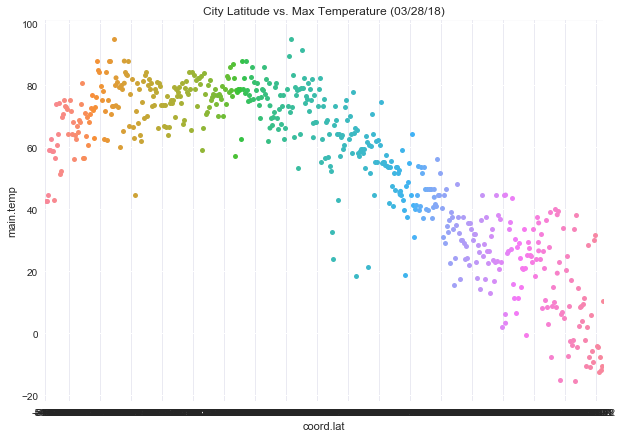

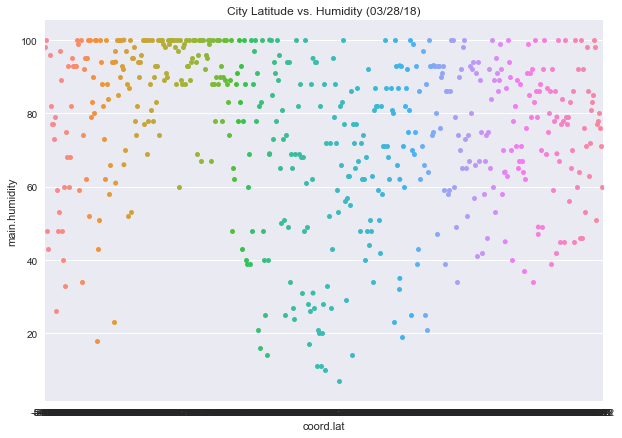

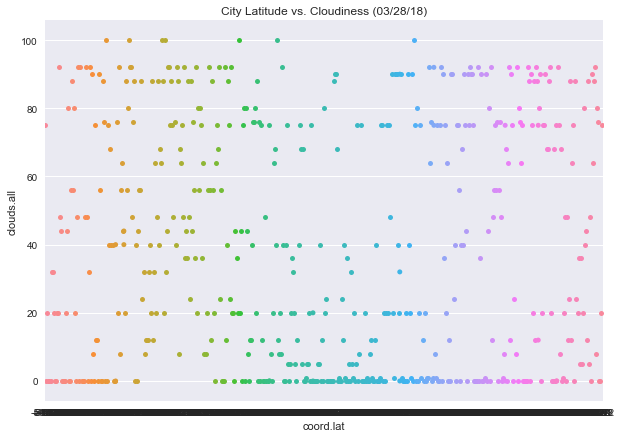

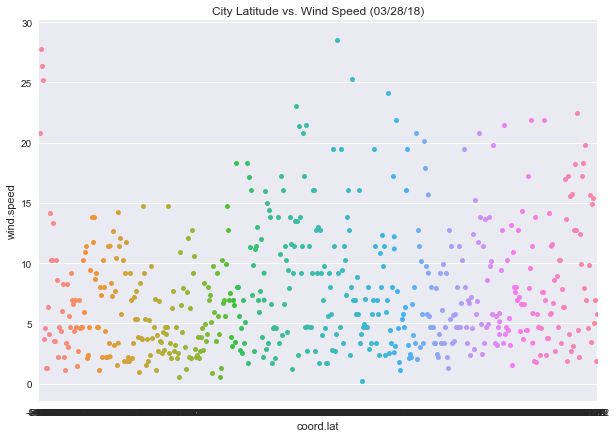

In [122]:
fig, ax = plt.subplots()
sns.plt.rcParams["figure.figsize"] = (10, 7)
data=city_data_df

sns.plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
sns.swarmplot( x="coord.lat",y="main.temp",data =data)
plt.show()
sns.plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
sns.swarmplot( x="coord.lat",y="main.humidity", data =data)
plt.show()
sns.plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
sns.swarmplot( x="coord.lat",y="clouds.all", data =data)
plt.show()
sns.plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
sns.swarmplot( x="coord.lat", y="wind.speed", data =data)
plt.show()

In [ ]:
#Documentation on OWM wrapper ---> https://github.com/crazycapivara/openweathermapy
#openweathermap complete city list:
    #http://openweathermap.org/help/city_list.txt 
        #one method ---> check against list
        #another method ---> skip if error returned 
    
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html

#Mapping ----> http://pandas.pydata.org/pandas-docs/version/0.19/generated/pandas.Series.map.html
#to_csv ------>https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html

#https://stackoverflow.com/questions/26666919/python-pandas-add-column-in-dataframe-from-list
#https://stackoverflow.com/questions/42632470/how-to-add-dictionaries-to-a-dataframe-as-a-row

#Put requested data into a dictionary that contains a list (intention to append to dataframe)
    #views = {"summary":["name", "coord.lat", "coord.lon","main.temp","main.humidity","wind.speed","clouds.all"]}
    #print(current_city(*views["summary"]))
    #city_data_list.append(current_city(*views["summary"]))

